In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [28]:
data = pd.read_csv('ukCo2Emissions.csv')
print (data)

   Region Greenhouse gas  CalendarYear  CO2_emissions_kt CO2e
0      UK            CO2          2005               0.380289
1      UK            CO2          2006               0.385347
2      UK            CO2          2007               0.375697
3      UK            CO2          2008               0.380823
4      UK            CO2          2009               0.333440
5      UK            CO2          2010               0.349909
6      UK            CO2          2011               0.321024
7      UK            CO2          2012               0.306102
8      UK            CO2          2013               0.319948
9      UK            CO2          2014               0.211192
10     UK            CO2          2015               0.216906
11     UK            CO2          2016               0.191065
12     UK            CO2          2017               0.170019
13     UK            CO2          2018               0.158432
14     UK            CO2          2019               0.127619
15     U

In [29]:
x = data.iloc[:,[2,3]]

In [30]:
x

,CalendarYear,CO2_emissions_kt CO2e
0,2005,0.380289
1,2006,0.385347
2,2007,0.375697
3,2008,0.380823
4,2009,0.333440
5,2010,0.349909
6,2011,0.321024
7,2012,0.306102
8,2013,0.319948
9,2014,0.211192


In [31]:
kmeans = KMeans(3)

In [32]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [33]:
identified_clusters = kmeans.fit_predict(x)

In [34]:
identified_clusters

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2])

In [35]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Region,Greenhouse gas,CalendarYear,CO2_emissions_kt CO2e,Cluster
0,UK,CO2,2005,0.380289,1
1,UK,CO2,2006,0.385347,1
2,UK,CO2,2007,0.375697,1
3,UK,CO2,2008,0.380823,1
4,UK,CO2,2009,0.333440,1
5,UK,CO2,2010,0.349909,1
6,UK,CO2,2011,0.321024,0
7,UK,CO2,2012,0.306102,0
8,UK,CO2,2013,0.319948,0
9,UK,CO2,2014,0.211192,0


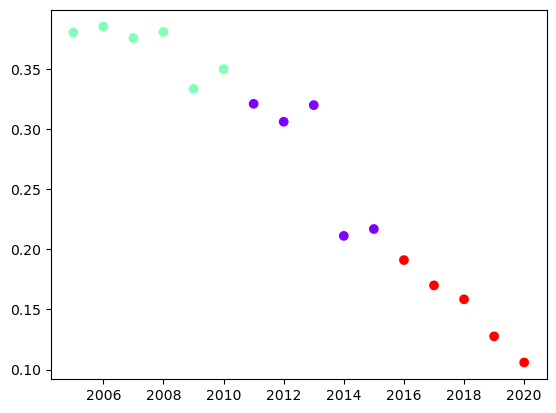

In [36]:
plt.scatter(data_with_clusters['CalendarYear'],data_with_clusters['CO2_emissions_kt CO2e'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.show()

In [37]:
scaler = StandardScaler()
scaler.fit(data[['CO2_emissions_kt CO2e']])
data['CO2_emissions_kt CO2e'] = scaler.transform(data[['CO2_emissions_kt CO2e']])

scaler.fit(data[['CalendarYear']])
data['CalendarYear'] = scaler.transform(data[['CalendarYear']])

In [38]:
data

,Region,Greenhouse gas,CalendarYear,CO2_emissions_kt CO2e
0,UK,CO2,-1.626978,1.138299
1,UK,CO2,-1.410048,1.190908
2,UK,CO2,-1.193118,1.090531
3,UK,CO2,-0.976187,1.143851
4,UK,CO2,-0.759257,0.650983
5,UK,CO2,-0.542326,0.822290
6,UK,CO2,-0.325396,0.521829
7,UK,CO2,-0.108465,0.366617
8,UK,CO2,0.108465,0.510637
9,UK,CO2,0.325396,-0.620620


In [39]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['CalendarYear','CO2_emissions_kt CO2e']])
y_predicted

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [40]:
data['cluster']=y_predicted
data

,Region,Greenhouse gas,CalendarYear,CO2_emissions_kt CO2e,cluster
0,UK,CO2,-1.626978,1.138299,2
1,UK,CO2,-1.410048,1.190908,2
2,UK,CO2,-1.193118,1.090531,2
3,UK,CO2,-0.976187,1.143851,2
4,UK,CO2,-0.759257,0.650983,0
5,UK,CO2,-0.542326,0.822290,0
6,UK,CO2,-0.325396,0.521829,0
7,UK,CO2,-0.108465,0.366617,0
8,UK,CO2,0.108465,0.510637,0
9,UK,CO2,0.325396,-0.620620,1


In [41]:
km.cluster_centers_

array([[-0.32539569,  0.57447125],
       [ 0.97618706, -1.06227782],
       [-1.30158275,  1.14089712]])

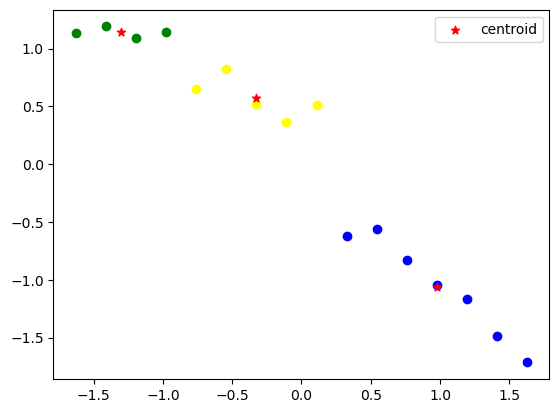

In [43]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]

plt.scatter(df1.CalendarYear	,df1['CO2_emissions_kt CO2e'],color='yellow')
plt.scatter(df2.CalendarYear	,df2['CO2_emissions_kt CO2e'],color='blue')
plt.scatter(df3.CalendarYear	,df3['CO2_emissions_kt CO2e'],color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='*',label='centroid')
plt.legend()